# Craft Beer Final Notebook

#### James Allen

This notebook is for exploring the craft beer data set

## Executive Summary

- a

- b

- c

## Conclusion

- Drink More Beer


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import beer_df, beer_states, top_beers, train_validate_test_split

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
# getting the beer data from my acquire file
df = beer_df()
df.head() # check_yo_head

,number,abv,ibu,beer,beer_style,ounces,brewery,city,state
0,0,0.050,43.027972,Pub Beer,American Pale Lager,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,43.027972,Devil's Cup,American Pale Ale (APA),12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,43.027972,Rise of the Phoenix,American IPA,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,43.027972,Sinister,American Double / Imperial IPA,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,43.027972,Sex and Candy,American IPA,12.0,Fort Point Beer Company,San Francisco,CA


In [3]:
# using a describe to look at some statistics in the beer data
df.describe()

,number,abv,ibu,ounces
count,558.000000,558.000000,558.000000,558.000000
mean,278.500000,0.060514,43.027972,13.391398
std,161.224998,0.013622,18.697909,1.964075
min,0.000000,0.032000,4.000000,8.400000
25%,139.250000,0.050000,36.000000,12.000000
50%,278.500000,0.058000,43.027972,12.000000
75%,417.750000,0.068000,43.027972,16.000000
max,557.000000,0.125000,138.000000,24.000000


# Explore

### Making Wordclouds from Beer and Beer Styles

(-0.5, 1199.5, 799.5, -0.5)

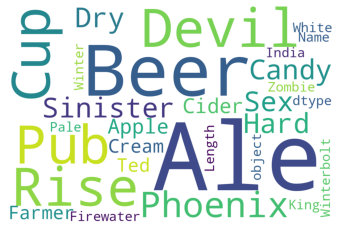

In [4]:
from wordcloud import WordCloud

beers = df.beer
# wordcloud of beer names
img = WordCloud(background_color='white', width=1200, height=800).generate(str(beers))
plt.imshow(img)
plt.axis('off')

(-0.5, 1199.5, 799.5, -0.5)

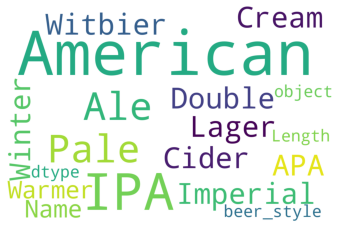

In [5]:
beers = df.beer_style
# wordcloud of beer styles
img = WordCloud(background_color='white', width=1200, height=800).generate(str(beers))
plt.imshow(img)
plt.axis('off')

### Taking a look at the top beers

In [7]:
# using top_beers function from acquire
top_beers().head()

,beer_type,total
0,American IPA,88
1,American Pale Ale (APA),54
2,American Amber / Red Ale,33
3,American Blonde Ale,25
4,American Double / Imperial IPA,24


- American IPA is by far the most popular beer type
- It looks like American Ales are all in the top 5 beer types

### Bar chart of the 10 Top Flight Beers

Text(0.5, 1.0, '10 Top Flight Beers')

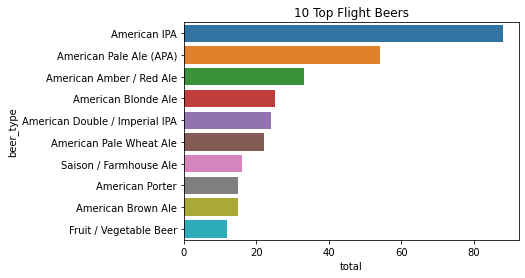

In [8]:
sns.barplot(x='total', y='beer_type', data=top_beers().head(10))
plt.title('10 Top Flight Beers')

#### Takeaways
- Visually American IPA is the most popular
- American Pale Ale (APA) is the Second most popular
- It looks like the remaining beers are close in rankings

### Pie Chart of Top 10 Beers 

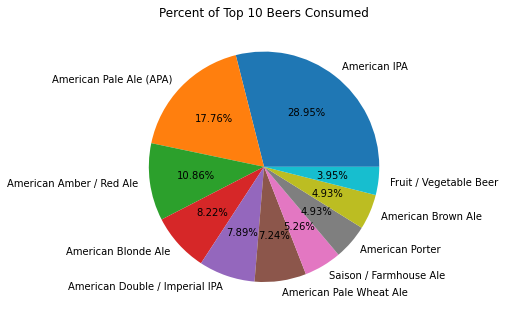

In [10]:
top10_beers = top_beers().head(10)
# percentage of top 10 beers in the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = top10_beers['beer_type']
totals = top10_beers['total']
ax.pie(totals, labels = labels, autopct='%1.2f%%')
plt.title('Percent of Top 10 Beers Consumed')
plt.show()

#### Takeaways
- Roughly 29% is American IPA
- Fruit / Vegetable Beer is the lowest with less than 4%

### Plotting the Alcohol by Volume

ABV Median: 0.0579999999999999


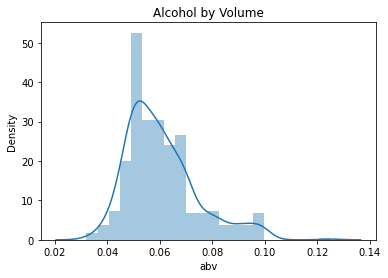

In [11]:
sns.distplot(df.abv)
plt.title('Alcohol by Volume')

print('ABV Median:', df.abv.median())

#### Takeaways
- It looks like most beers fall between 5 and 7 percent ABV
- Mean: 6%
- Median: 5.8%

### Top 10 Brewery States

In [12]:
# using beer_states function from acquire
beer_states().head(10)

,states,breweries
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28
5,PA,25
6,WA,23
7,MA,23
8,IN,22
9,WI,20


#### Takeaways
- Colorado has the most breweries: 47

### Bar Graph for Most Cities with Breweries

Text(0, 0.5, 'Number of Breweries')

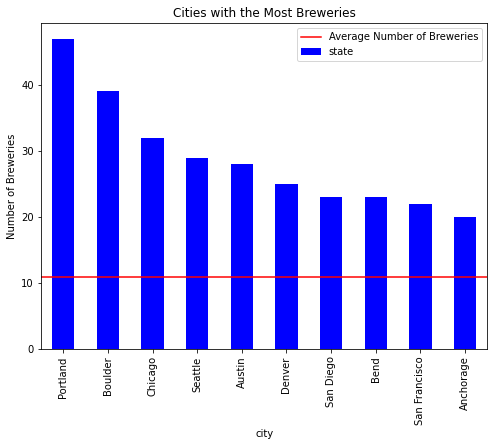

In [13]:
# plotting a bar graph for the number of breweries in each state
plot = df.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(8,6), colormap='winter')
plot.set_xlabel('State')
plot.set_ylabel('Number of Breweries')
# adding an average number of breweries line 
mean_line = plot.axhline(df.state.value_counts().mean(), color='r',\
                         label='Average Number of Breweries')
plt.legend()


# plotting a bar graph from the cities with the most breweries
plot_c = df.groupby('city')['beer_style'].count().nlargest(10).plot(kind='bar', \
               title='Cities with the Most Breweries', \
               colormap='winter',  )
plot_c.set_ylabel('Number of Breweries')

#### Takeaways
- Portland has the most breweries but was 3rd as far as breweries by state
- Boulder is the Second most breweries by city with Colorado as the most breweries by state
- It looks like the average breweries is just over 10

# Modeling

In [14]:
# using three columns for modeling purposes and creating a dataframe
df = df[['abv', 'ibu', 'beer_style']]
df.head() # check_yo_head

,abv,ibu,beer_style
0,0.050,43.027972,American Pale Lager
1,0.066,43.027972,American Pale Ale (APA)
2,0.071,43.027972,American IPA
3,0.090,43.027972,American Double / Imperial IPA
4,0.075,43.027972,American IPA


In [15]:
# making a model df  with beer styles that occur more than 10 times, which was the average 
model_df = df.groupby('beer_style').filter(lambda x: len(x) > 10)
model_df.head() # check_yo_head

,abv,ibu,beer_style
1,0.066,43.027972,American Pale Ale (APA)
2,0.071,43.027972,American IPA
3,0.090,43.027972,American Double / Imperial IPA
4,0.075,43.027972,American IPA
6,0.045,43.027972,American Pale Ale (APA)


In [16]:
# looking at the number of different beers 
df.beer_style.nunique()

77

<Figure size 1440x720 with 0 Axes>

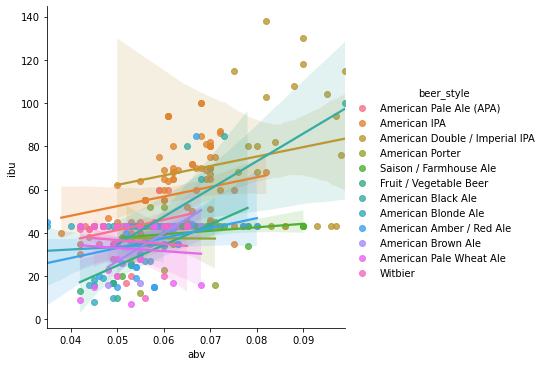

In [17]:
# plotting a line plot of the model_df beers
plt.figure(figsize=(20,10)) 
beer = sns.lmplot(x='abv',y='ibu',data=model_df, hue='beer_style')

plt.show(beer)

## Scaling the Beer Data

In [18]:
# scaling the model_df beer data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(model_df.drop('beer_style',axis=1))
scaled_features = scaler.transform(model_df.drop('beer_style',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=model_df.columns[:-1])

## Splitting the Beer Data

In [19]:
# split into train, validate, test
train, validate, test = train_validate_test_split(model_df, target='beer_style', seed=123)
    
X_train = train.drop(columns=['beer_style'])
y_train = train.beer_style

X_validate = validate.drop(columns=['beer_style'])
y_validate = validate.beer_style

X_test = test.drop(columns=['beer_style'])
y_test = test.beer_style

In [20]:
train.head() #check_yo_head

,abv,ibu,beer_style
521,0.050,43.027972,American Amber / Red Ale
503,0.053,25.000000,American Blonde Ale
97,0.065,43.027972,American IPA
429,0.056,43.027972,Fruit / Vegetable Beer
386,0.058,43.027972,American Pale Ale (APA)


# KNN

In [21]:
# make the thing
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the thing
knn.fit(X_train, y_train)
# make predictions
y_pred = knn.predict(X_train)
# estimate probability
y_pred_proba = knn.predict_proba(X_train)

# evaluate the model
# compute the accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
# create a confusion matrix
print(confusion_matrix(y_train, y_pred))
# create a classification report
print(classification_report(y_train, y_pred))
# evaluate on out-of-sample data
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.51
[[ 7  0  1  0  0  5  5  0  0  0  0  0]
 [ 2  0  0  0  0  3  1  0  0  0  0  0]
 [ 1  0 12  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  4  0  3  1  0  0  0  0  0]
 [ 1  0  0  0  7  5  0  0  0  0  0  0]
 [ 2  0  0  0  0 44  3  0  0  0  0  0]
 [ 8  0  1  0  0  4 16  0  0  0  1  0]
 [ 3  0  2  0  0  0  5  2  0  0  0  0]
 [ 1  0  2  1  0  3  0  1  1  0  0  0]
 [ 1  0  1  2  0  2  1  0  0  0  0  0]
 [ 2  0  0  0  2  3  0  0  2  0  0  0]
 [ 3  0  2  0  0  1  0  0  0  0  0  0]]
                                precision    recall  f1-score   support

      American Amber / Red Ale       0.23      0.39      0.29        18
            American Black Ale       0.00      0.00      0.00         6
           American Blonde Ale       0.55      0.86      0.67        14
            American Brown Ale       0.57      0.44      0.50         9
American Double / Imperial IPA       0.78      0.54      0.64        13
                  American IPA       0.60      0.

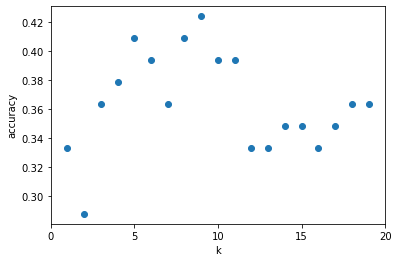

In [22]:
# visualize the model
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

## Decision Tree

In [23]:
# make the thing
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
# fit the thing
clf = clf.fit(X_train, y_train)

[Text(418.5, 475.65000000000003, 'abv <= 0.059\ngini = 0.864\nsamples = 182\nvalue = [18, 6, 14, 9, 13, 49, 30, 12, 9, 7, 9, 6]\nclass = American IPA'),
 Text(209.25, 339.75, 'ibu <= 27.5\ngini = 0.844\nsamples = 86\nvalue = [8, 2, 14, 6, 1, 5, 26, 10, 4, 5, 2, 3]\nclass = American Pale Ale (APA)'),
 Text(104.625, 203.85000000000002, 'abv <= 0.046\ngini = 0.834\nsamples = 21\nvalue = [2, 0, 5, 5, 0, 0, 1, 2, 2, 3, 1, 0]\nclass = American Blonde Ale'),
 Text(52.3125, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = American Blonde Ale'),
 Text(156.9375, 67.94999999999999, 'gini = 0.842\nsamples = 19\nvalue = [2, 0, 3, 5, 0, 0, 1, 2, 2, 3, 1, 0]\nclass = American Brown Ale'),
 Text(313.875, 203.85000000000002, 'ibu <= 42.514\ngini = 0.798\nsamples = 65\nvalue = [6, 2, 9, 1, 1, 5, 25, 8, 2, 2, 1, 3]\nclass = American Pale Ale (APA)'),
 Text(261.5625, 67.94999999999999, 'gini = 0.554\nsamples = 19\nvalue = [2, 0, 0, 0, 0, 2, 12, 3, 0, 0, 0,

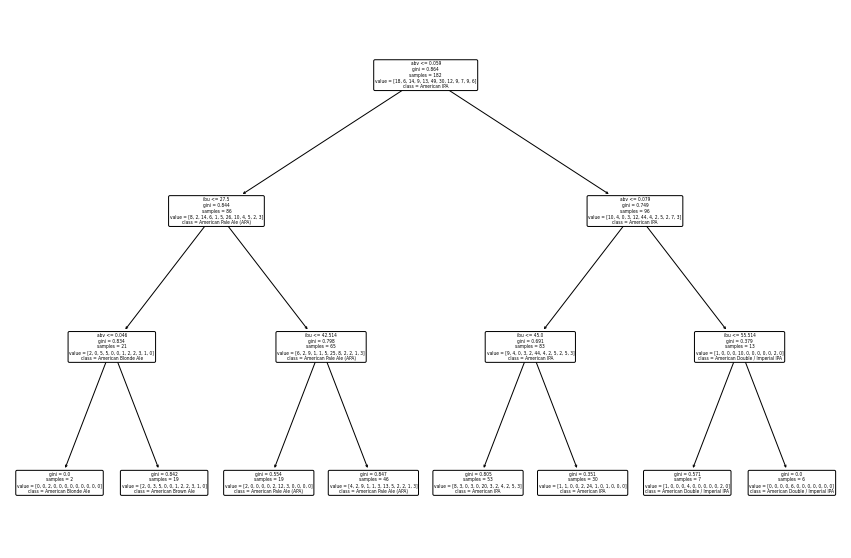

In [24]:
# plot the thing
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

In [25]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['American Pale Ale (APA)', 'American Brown Ale', 'American IPA',
       'American Pale Ale (APA)', 'American Pale Ale (APA)'], dtype=object)

In [26]:
# estimate probablilty
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.08695652, 0.04347826, 0.19565217, 0.02173913, 0.02173913,
        0.06521739, 0.2826087 , 0.10869565, 0.04347826, 0.04347826,
        0.02173913, 0.06521739],
       [0.10526316, 0.        , 0.15789474, 0.26315789, 0.        ,
        0.        , 0.05263158, 0.10526316, 0.10526316, 0.15789474,
        0.05263158, 0.        ],
       [0.1509434 , 0.05660377, 0.        , 0.05660377, 0.        ,
        0.37735849, 0.05660377, 0.03773585, 0.0754717 , 0.03773585,
        0.09433962, 0.05660377],
       [0.08695652, 0.04347826, 0.19565217, 0.02173913, 0.02173913,
        0.06521739, 0.2826087 , 0.10869565, 0.04347826, 0.04347826,
        0.02173913, 0.06521739],
       [0.08695652, 0.04347826, 0.19565217, 0.02173913, 0.02173913,
        0.06521739, 0.2826087 , 0.10869565, 0.04347826, 0.04347826,
        0.02173913, 0.06521739]])

In [27]:
# evaluate model accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.47


In [28]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[ 0,  0,  0,  2,  1,  9,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  3,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  4, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  2,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  5,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  2,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  5,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0]])

In [29]:
y_train.value_counts()

American IPA                      49
American Pale Ale (APA)           30
American Amber / Red Ale          18
American Blonde Ale               14
American Double / Imperial IPA    13
American Pale Wheat Ale           12
American Brown Ale                 9
American Porter                    9
Saison / Farmhouse Ale             9
Fruit / Vegetable Beer             7
American Black Ale                 6
Witbier                            6
Name: beer_style, dtype: int64

In [30]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,American Amber / Red Ale,American Black Ale,American Blonde Ale,American Brown Ale,American Double / Imperial IPA,American IPA,American Pale Ale (APA),American Pale Wheat Ale,American Porter,Fruit / Vegetable Beer,Saison / Farmhouse Ale,Witbier
American Amber / Red Ale,0,0,0,2,1,9,6,0,0,0,0,0
American Black Ale,0,0,0,0,0,4,2,0,0,0,0,0
American Blonde Ale,0,0,2,3,0,0,9,0,0,0,0,0
American Brown Ale,0,0,0,5,0,3,1,0,0,0,0,0
American Double / Imperial IPA,0,0,0,0,10,2,1,0,0,0,0,0
American IPA,0,0,0,0,0,44,5,0,0,0,0,0
American Pale Ale (APA),0,0,0,1,0,4,25,0,0,0,0,0
American Pale Wheat Ale,0,0,0,2,0,2,8,0,0,0,0,0
American Porter,0,0,0,2,0,5,2,0,0,0,0,0
Fruit / Vegetable Beer,0,0,0,3,0,2,2,0,0,0,0,0


In [31]:
# create a classification report
print(classification_report(y_train, y_pred))

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.00      0.00      0.00        18
            American Black Ale       0.00      0.00      0.00         6
           American Blonde Ale       1.00      0.14      0.25        14
            American Brown Ale       0.26      0.56      0.36         9
American Double / Imperial IPA       0.77      0.77      0.77        13
                  American IPA       0.53      0.90      0.67        49
       American Pale Ale (APA)       0.38      0.83      0.53        30
       American Pale Wheat Ale       0.00      0.00      0.00        12
               American Porter       0.00      0.00      0.00         9
        Fruit / Vegetable Beer       0.00      0.00      0.00         7
        Saison / Farmhouse Ale       0.00      0.00      0.00         9
                       Witbier       0.00      0.00      0.00         6

                      accuracy                           0.47 

In [32]:
# Model accuracy on evaluate
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.45


In [33]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.00      0.00      0.00         8
            American Black Ale       0.00      0.00      0.00         3
           American Blonde Ale       0.00      0.00      0.00         6
            American Brown Ale       0.11      0.33      0.17         3
American Double / Imperial IPA       0.75      1.00      0.86         6
                  American IPA       0.55      0.81      0.65        21
       American Pale Ale (APA)       0.39      0.85      0.54        13
       American Pale Wheat Ale       0.00      0.00      0.00         5
               American Porter       0.00      0.00      0.00         3
        Fruit / Vegetable Beer       0.00      0.00      0.00         3
        Saison / Farmhouse Ale       0.00      0.00      0.00         4
                       Witbier       0.00      0.00      0.00         3

                      accuracy                           0.45 

In [34]:
# Model accuracy on test
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.44


### Takeaways

## Random Forest

In [35]:
# create the thing
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
# fit the thing
rf.fit(X_train, y_train)

# feature importance
print('Feature Importance:', rf.feature_importances_)

Feature Importance: [0.58809361 0.41190639]


In [36]:
# make predictions
y_pred = rf.predict(X_train)
# estimate probability
y_pred_proba = rf.predict_proba(X_train)
# compute the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
# create a confusion matrix
print(confusion_matrix(y_train, y_pred))
# create a classification report
print(classification_report(y_train, y_pred))


Accuracy of random forest classifier on training set: 0.51
[[ 0  0  1  0  1  9  7  0  0  0  0  0]
 [ 0  0  0  0  0  3  3  0  0  0  0  0]
 [ 0  0  4  0  0  0 10  0  0  0  0  0]
 [ 0  0  1  4  0  3  1  0  0  0  0  0]
 [ 0  0  0  0 11  1  1  0  0  0  0  0]
 [ 0  0  0  0  0 44  5  0  0  0  0  0]
 [ 0  0  0  0  0  4 26  0  0  0  0  0]
 [ 0  0  2  0  0  2  8  0  0  0  0  0]
 [ 0  0  2  0  0  4  2  0  1  0  0  0]
 [ 0  0  0  1  0  2  2  0  0  2  0  0]
 [ 0  0  0  1  2  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  0  1  0  0  0]]
                                precision    recall  f1-score   support

      American Amber / Red Ale       0.00      0.00      0.00        18
            American Black Ale       0.00      0.00      0.00         6
           American Blonde Ale       0.40      0.29      0.33        14
            American Brown Ale       0.67      0.44      0.53         9
American Double / Imperial IPA       0.79      0.85      0.81        13
                  American IPA       0.

In [37]:
# evaluate on out-of-sample data
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.49


### Takeaways